# **Importing the Library**

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
tf.__version__

'2.3.1'

# **Image Data Exploration**

In [3]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path1 = 'data/train'
test_path1 = 'data/test'

# **Image Processing & Scaling**

In [4]:
# Scaling all the images between 0 to 1

train_datagen1 = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen1 = ImageDataGenerator(rescale=1./255)

In [5]:
train_set1 = train_datagen1.flow_from_directory(train_path1,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set1 = test_datagen1.flow_from_directory(test_path1,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 6184 images belonging to 3 classes.
Found 1481 images belonging to 3 classes.


# DenseNet121

In [6]:
from tensorflow.keras.applications.densenet import DenseNet121
mob1 = DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
x1= Flatten()(mob1.output)
prediction1 = Dense(3, activation='softmax')(x1)
model121 = Model(inputs = mob1.inputs, outputs = prediction1)
model121.summary()
model121.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [8]:
r1 = model121.fit(train_set1, validation_data=test_set1, epochs=50)

Epoch 1/50
194/194 [==============================] - 2273s 12s/step - loss: 3.7911 - accuracy: 0.4759 - val_loss: 2.2386 - val_accuracy: 0.3038
Epoch 2/50
194/194 [==============================] - 2250s 12s/step - loss: 2.9871 - accuracy: 0.4767 - val_loss: 38185.9375 - val_accuracy: 0.5273
Epoch 3/50
194/194 [==============================] - 2241s 12s/step - loss: 2.3092 - accuracy: 0.4985 - val_loss: 9949.4160 - val_accuracy: 0.5132
Epoch 4/50
194/194 [==============================] - 2558s 13s/step - loss: 1.8206 - accuracy: 0.5123 - val_loss: 2.3453 - val_accuracy: 0.3666
Epoch 5/50
194/194 [==============================] - 2520s 13s/step - loss: 1.4713 - accuracy: 0.5137 - val_loss: 493.2728 - val_accuracy: 0.5219
Epoch 6/50
194/194 [==============================] - 2170s 11s/step - loss: 1.2078 - accuracy: 0.5477 - val_loss: 32.0262 - val_accuracy: 0.4801
Epoch 7/50
194/194 [==============================] - 2830s 15s/step - loss: 1.2509 - accuracy: 0.5260 - val_loss: 3.060

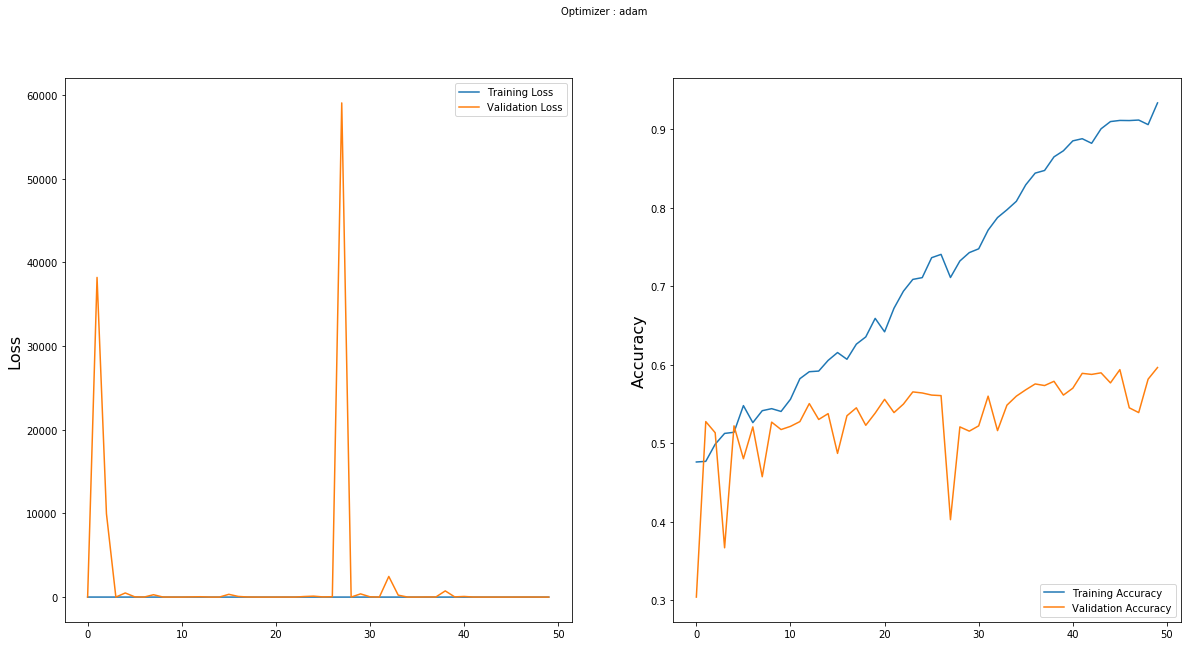

In [9]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Inception ResNet V2**

In [10]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 129s 1us/step


In [11]:
x31 = Flatten()(inc.output)
predictionss = Dense(3, activation='softmax')(x31)

In [12]:
modelss1 = Model(inputs = inc.inputs, outputs = predictionss)
modelss1.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [13]:
modelss1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss1.fit(train_set1, validation_data=test_set1, epochs=50)
x=r2

Epoch 1/50
194/194 [==============================] - 3277s 17s/step - loss: 1.6371 - accuracy: 0.5647 - val_loss: 27.7443 - val_accuracy: 0.5307
Epoch 2/50
194/194 [==============================] - 3202s 17s/step - loss: 1.6393 - accuracy: 0.5584 - val_loss: 38.2456 - val_accuracy: 0.4828
Epoch 3/50
194/194 [==============================] - 3179s 16s/step - loss: 0.9741 - accuracy: 0.5768 - val_loss: 1.0410 - val_accuracy: 0.5240
Epoch 4/50
194/194 [==============================] - 76598s 395s/step - loss: 0.9732 - accuracy: 0.6024 - val_loss: 0.9838 - val_accuracy: 0.5307
Epoch 5/50
194/194 [==============================] - 76481s 394s/step - loss: 0.9061 - accuracy: 0.6028 - val_loss: 2.2282 - val_accuracy: 0.5132
Epoch 6/50
194/194 [==============================] - 2320s 12s/step - loss: 1.0224 - accuracy: 0.6054 - val_loss: 423.5554 - val_accuracy: 0.5280
Epoch 7/50
194/194 [==============================] - 2460s 13s/step - loss: 0.8880 - accuracy: 0.6007 - val_loss: 1.1398 

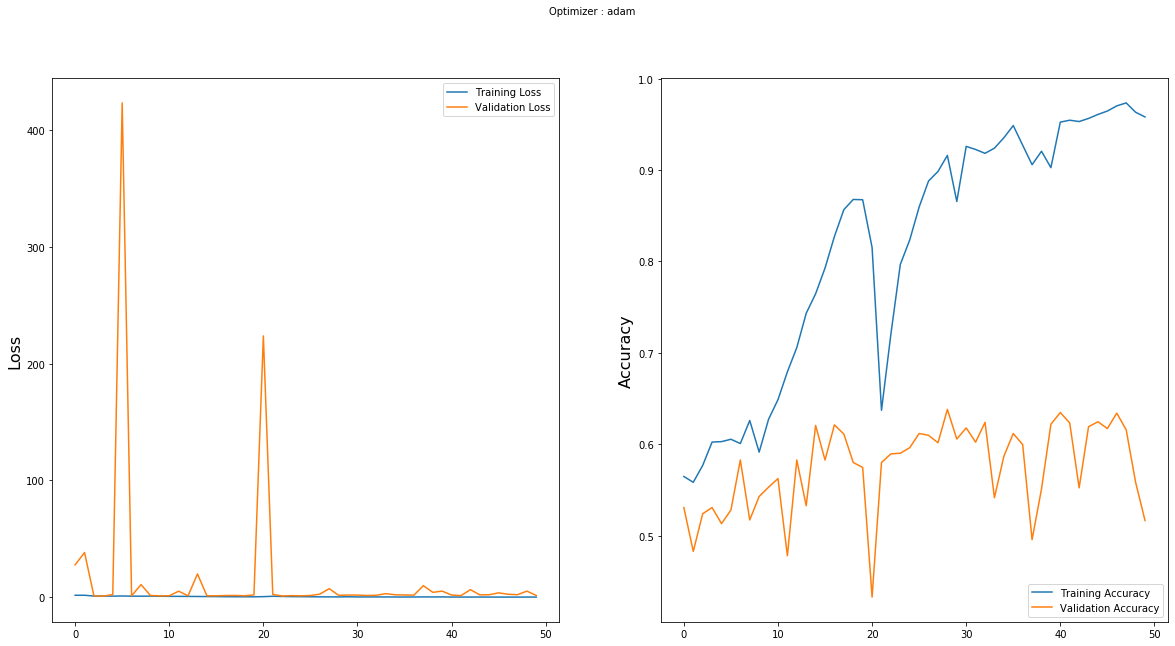

In [14]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [15]:
modelss1.save('model.h5')

In [16]:
model121.save('model1.h5')

# Google Net

In [17]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

In [18]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [19]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(3, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(3, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(3, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [20]:
model = GoogLeNet()

In [21]:
model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 109, 109, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 54, 54, 64)   0           conv2d_203[0][0]                 
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 54, 54, 64)   4160        max_pooling2d_4[0][0]            
__________________________________________________________________________________________

In [22]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = model.fit(train_set1, validation_data=test_set1, epochs=50)
x=r2

Epoch 1/50
194/194 [==============================] - 634s 3s/step - loss: 2.8005 - dense_6_loss: 0.9321 - dense_3_loss: 0.9329 - dense_5_loss: 0.9355 - dense_6_accuracy: 0.5669 - dense_3_accuracy: 0.5728 - dense_5_accuracy: 0.5681 - val_loss: 3.0130 - val_dense_6_loss: 1.0049 - val_dense_3_loss: 1.0058 - val_dense_5_loss: 1.0023 - val_dense_6_accuracy: 0.5273 - val_dense_3_accuracy: 0.5273 - val_dense_5_accuracy: 0.5273
Epoch 2/50
194/194 [==============================] - 621s 3s/step - loss: 2.7588 - dense_6_loss: 0.9205 - dense_3_loss: 0.9160 - dense_5_loss: 0.9223 - dense_6_accuracy: 0.5750 - dense_3_accuracy: 0.5775 - dense_5_accuracy: 0.5750 - val_loss: 3.0255 - val_dense_6_loss: 1.0135 - val_dense_3_loss: 1.0020 - val_dense_5_loss: 1.0100 - val_dense_6_accuracy: 0.5273 - val_dense_3_accuracy: 0.5273 - val_dense_5_accuracy: 0.5273
Epoch 3/50
194/194 [==============================] - 618s 3s/step - loss: 2.6975 - dense_6_loss: 0.9009 - dense_3_loss: 0.8966 - dense_5_loss: 0.9000

194/194 [==============================] - 443s 2s/step - loss: 2.2016 - dense_6_loss: 0.7242 - dense_3_loss: 0.7482 - dense_5_loss: 0.7293 - dense_6_accuracy: 0.6300 - dense_3_accuracy: 0.6195 - dense_5_accuracy: 0.6302 - val_loss: 2.9436 - val_dense_6_loss: 0.9668 - val_dense_3_loss: 0.9781 - val_dense_5_loss: 0.9987 - val_dense_6_accuracy: 0.5476 - val_dense_3_accuracy: 0.5564 - val_dense_5_accuracy: 0.5469
Epoch 40/50
194/194 [==============================] - 444s 2s/step - loss: 2.1789 - dense_6_loss: 0.7120 - dense_3_loss: 0.7439 - dense_5_loss: 0.7229 - dense_6_accuracy: 0.6438 - dense_3_accuracy: 0.6221 - dense_5_accuracy: 0.6332 - val_loss: 3.0292 - val_dense_6_loss: 1.0097 - val_dense_3_loss: 0.9968 - val_dense_5_loss: 1.0227 - val_dense_6_accuracy: 0.5368 - val_dense_3_accuracy: 0.5388 - val_dense_5_accuracy: 0.5388
Epoch 41/50
194/194 [==============================] - 449s 2s/step - loss: 2.1559 - dense_6_loss: 0.7043 - dense_3_loss: 0.7349 - dense_5_loss: 0.7167 - dense_

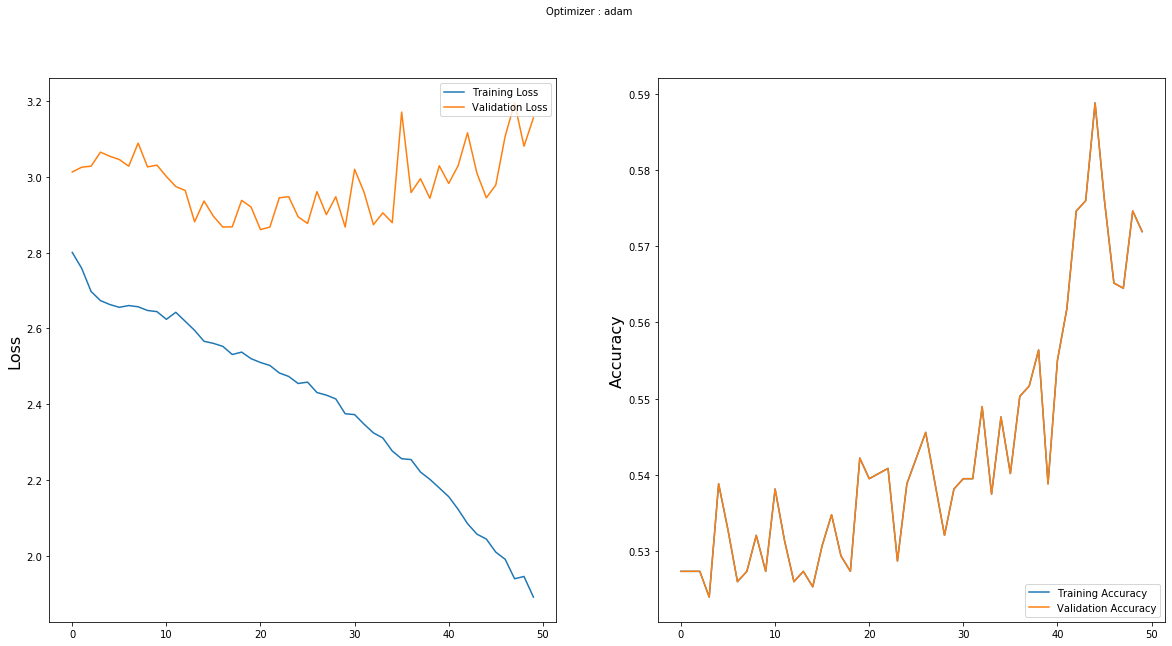

In [26]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['val_dense_3_accuracy'], label='Training Accuracy')
plt.plot(x.history['val_dense_3_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet 18

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf
from tensorflow.keras import datasets,models,layers

In [28]:
class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out

In [29]:
class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [30]:
from keras.layers import LeakyReLU
model = ResNet18(3)
# now add a ReLU layer explicitly:
#model.add(LeakyReLU(alpha=0.05))
model.build(input_shape = (None,224,224,3))

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [31]:
from keras.optimizers import SGD
# opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
model.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 
model.summary()

Model: "res_net18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_262 (Conv2D)          multiple                  9472      
_________________________________________________________________
batch_normalization_203 (Bat multiple                  256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling multiple                  0         
_________________________________________________________________
resnet_block (ResnetBlock)   multiple                  74368     
_________________________________________________________________
resnet_block_1 (ResnetBlock) multiple                  74368     
_________________________________________________________________
resnet_block_2 (ResnetBlock) multiple                  231296    
_________________________________________________________________
resnet_block_3 (ResnetBlock) multiple                  29

In [32]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_acc")

In [33]:
r2 = model.fit(train_set1, validation_data=test_set1, epochs=50)
x=r2

Epoch 1/50
194/194 [==============================] - 644s 3s/step - loss: 0.9977 - accuracy: 0.5576 - val_loss: 1.0027 - val_accuracy: 0.5253
Epoch 2/50
194/194 [==============================] - 719s 4s/step - loss: 0.8774 - accuracy: 0.5728 - val_loss: 1.0048 - val_accuracy: 0.5071
Epoch 3/50
194/194 [==============================] - 685s 4s/step - loss: 0.8779 - accuracy: 0.5749 - val_loss: 0.9871 - val_accuracy: 0.5327
Epoch 4/50
194/194 [==============================] - 701s 4s/step - loss: 0.8599 - accuracy: 0.5752 - val_loss: 1.0390 - val_accuracy: 0.5233
Epoch 5/50
194/194 [==============================] - 703s 4s/step - loss: 0.8648 - accuracy: 0.5823 - val_loss: 1.1012 - val_accuracy: 0.5496
Epoch 6/50
194/194 [==============================] - 706s 4s/step - loss: 0.8558 - accuracy: 0.5818 - val_loss: 1.0087 - val_accuracy: 0.5118
Epoch 7/50
194/194 [==============================] - 709s 4s/step - loss: 0.8527 - accuracy: 0.5802 - val_loss: 1.3871 - val_accuracy: 0.4983

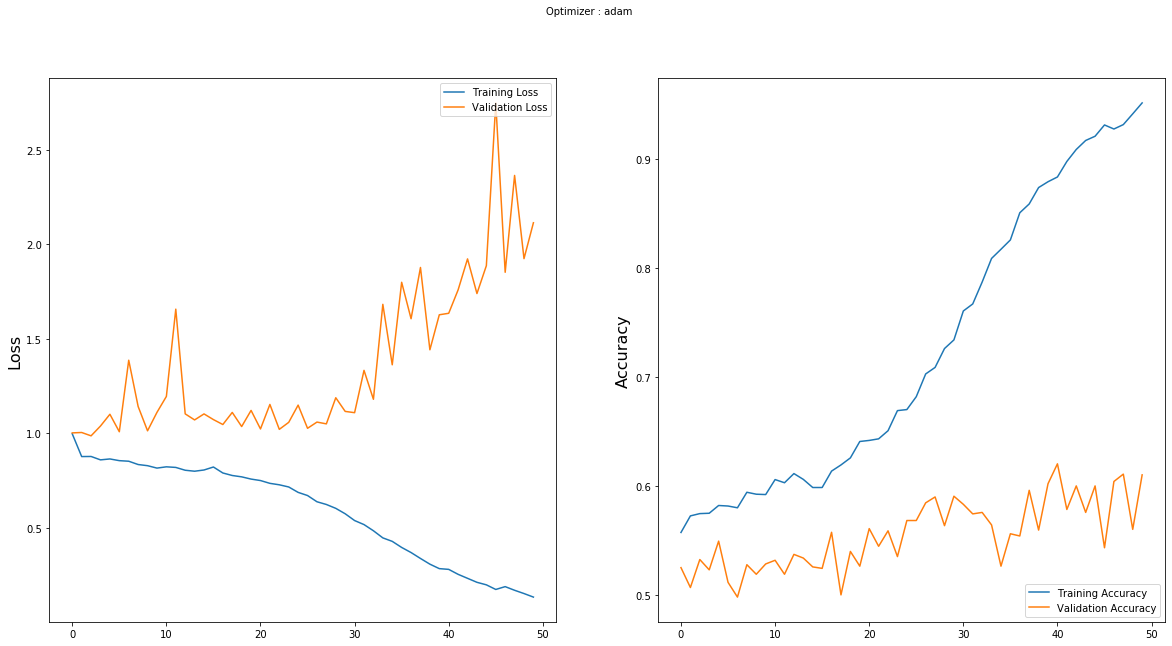

In [34]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet with Relu

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

In [36]:
np.random.seed(1000)

#Instantiation
model = Sequential()
#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#3rd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#Output Layer
model.add(Dense(3))
model.add(BatchNormalization())
model.add(Activation('softmax'))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_282 (Conv2D)          (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_223 (Bat (None, 56, 56, 96)        384       
_________________________________________________________________
activation_203 (Activation)  (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_283 (Conv2D)          (None, 28, 28, 256)       614656    
_________________________________________________________________
batch_normalization_224 (Bat (None, 28, 28, 256)       1024      
_________________________________________________________________
activation_204 (Activation)  (None, 28, 28, 256)       0

In [37]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [38]:
history1 = model.fit_generator(train_set1, validation_data=test_set1, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
194/194 [==============================] - 451s 2s/step - loss: 1.0474 - accuracy: 0.4672 - val_loss: 1.0249 - val_accuracy: 0.5003
Epoch 2/50
194/194 [==============================] - 458s 2s/step - loss: 0.9647 - accuracy: 0.5477 - val_loss: 1.0337 - val_accuracy: 0.4862
Epoch 3/50
194/194 [==============================] - 759s 4s/step - loss: 0.9173 - accuracy: 0.5668 - val_loss: 0.9538 - val_accuracy: 0.5253
Epoch 4/50
194/194 [==============================] - 402s 2s/step - loss: 0.8821 - accuracy: 0.5826 - val_loss: 0.9837 - val_accuracy: 0.5253
Epoch 5/50
194/194 [==============================] - 424s 2s/step - loss: 0.8597 - accuracy: 0.5912 - val_loss: 0.9443 - val_accuracy: 0.5348
Epoch 6/50
194/194 [==============================] - 428s 2s/step - loss: 0.8307 - accuracy: 0.5948 - val_loss: 1.1300 - val_accuracy: 0.4477
Epoch 7/50
194/194 [==============================] - 428s 2s/step

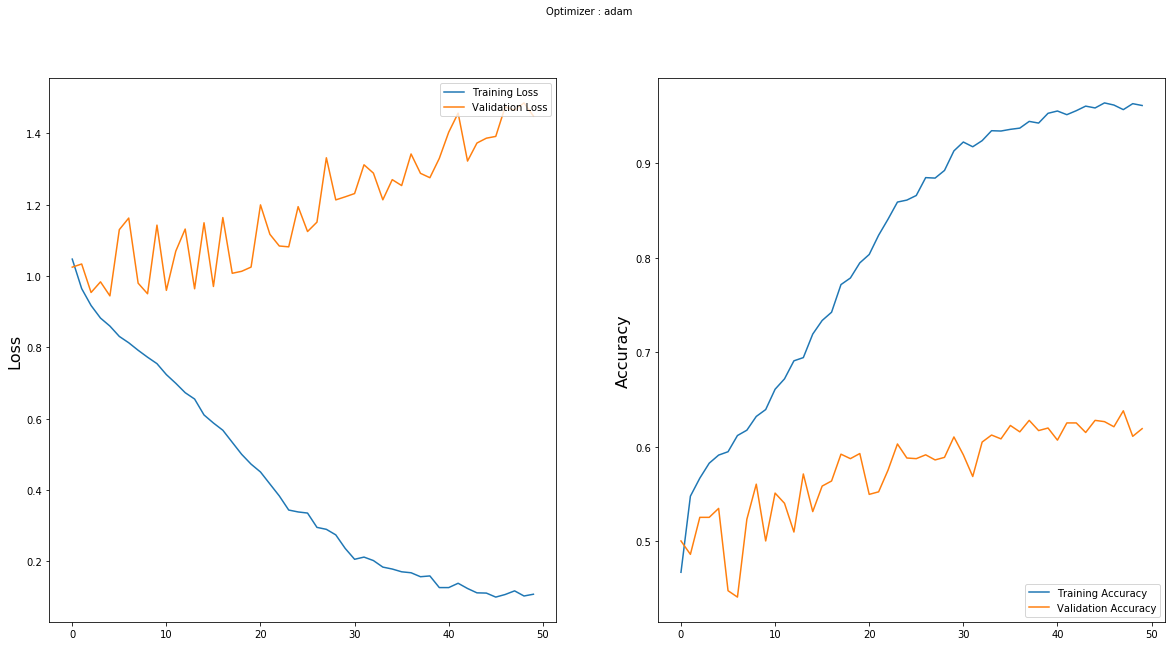

In [39]:
import matplotlib.pyplot as plt

x=history1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet with PRelu

In [40]:
#Instantiation
model = Sequential()
act = keras.layers.advanced_activations.PReLU(weights=None)
#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(act)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#3rd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#Output Layer
model.add(Dense(3))
model.add(BatchNormalization())
model.add(Activation('softmax'))

#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_287 (Conv2D)          (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_232 (Bat (None, 56, 56, 96)        384       
_________________________________________________________________
p_re_lu (PReLU)              (None, 56, 56, 96)        301056    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_288 (Conv2D)          (None, 28, 28, 256)       614656    
_________________________________________________________________
batch_normalization_233 (Bat (None, 28, 28, 256)       1024      
_________________________________________________________________
activation_212 (Activation)  (None, 28, 28, 256)      

In [41]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [42]:
history1 = model.fit_generator(train_set1, validation_data=test_set1, epochs=50)

Epoch 1/50
194/194 [==============================] - 439s 2s/step - loss: 1.0636 - accuracy: 0.4670 - val_loss: 1.0386 - val_accuracy: 0.5051
Epoch 2/50
194/194 [==============================] - 440s 2s/step - loss: 0.9535 - accuracy: 0.5521 - val_loss: 1.0411 - val_accuracy: 0.4416
Epoch 3/50
194/194 [==============================] - 439s 2s/step - loss: 0.9069 - accuracy: 0.5739 - val_loss: 1.0683 - val_accuracy: 0.4929
Epoch 4/50
194/194 [==============================] - 439s 2s/step - loss: 0.8669 - accuracy: 0.5948 - val_loss: 1.0189 - val_accuracy: 0.5030
Epoch 5/50
194/194 [==============================] - 439s 2s/step - loss: 0.8492 - accuracy: 0.5909 - val_loss: 0.9816 - val_accuracy: 0.5267
Epoch 6/50
194/194 [==============================] - 438s 2s/step - loss: 0.8216 - accuracy: 0.6007 - val_loss: 1.0175 - val_accuracy: 0.5213
Epoch 7/50
194/194 [==============================] - 442s 2s/step - loss: 0.8034 - accuracy: 0.6129 - val_loss: 1.0070 - val_accuracy: 0.5192

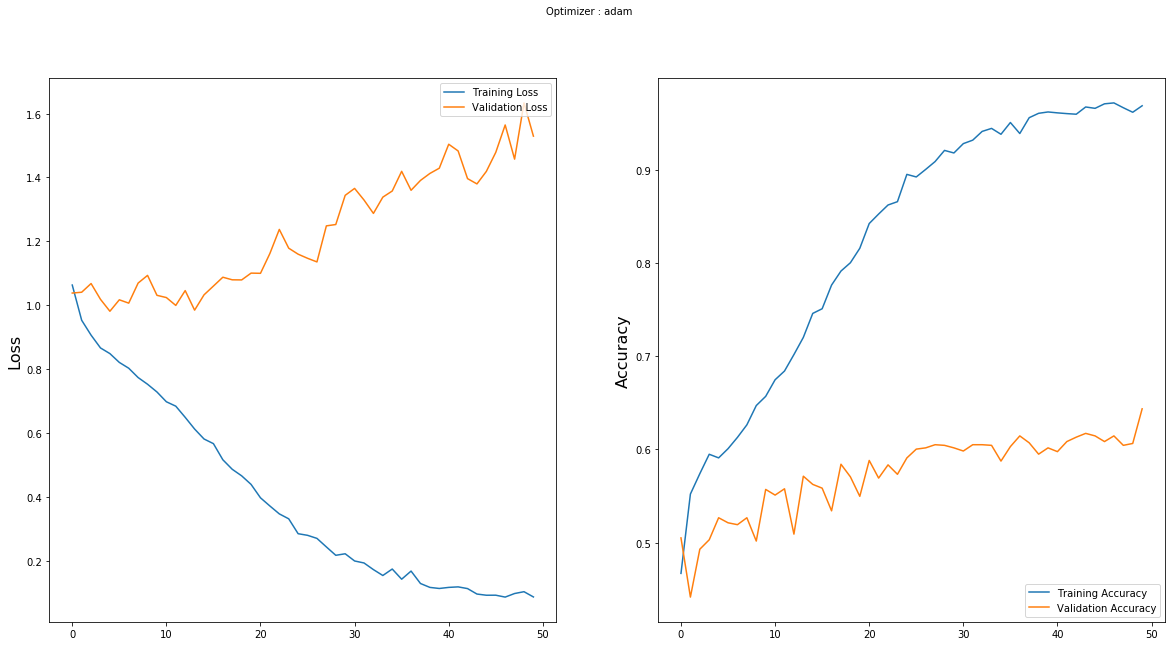

In [43]:
import matplotlib.pyplot as plt

x=history1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet LeakyRelu

In [44]:
from keras.layers import LeakyReLU
#Instantiation
model = Sequential()
#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Dense(90))

# now add a ReLU layer explicitly:
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#3rd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#Output Layer
model.add(Dense(3))
model.add(BatchNormalization())
model.add(Activation('softmax'))

#Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_292 (Conv2D)          (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_241 (Bat (None, 56, 56, 96)        384       
_________________________________________________________________
dense_16 (Dense)             (None, 56, 56, 90)        8730      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 56, 56, 90)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 28, 28, 90)        0         
_________________________________________________________________
conv2d_293 (Conv2D)          (None, 28, 28, 256)       576256    
_________________________________________________________________
batch_normalization_242 (Bat (None, 28, 28, 256)      

In [45]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [46]:
history1 = model.fit_generator(train_set1, validation_data=test_set1, epochs=50)

Epoch 1/50
194/194 [==============================] - 505s 3s/step - loss: 1.0497 - accuracy: 0.4681 - val_loss: 1.2728 - val_accuracy: 0.3342
Epoch 2/50
194/194 [==============================] - 448s 2s/step - loss: 0.9532 - accuracy: 0.5484 - val_loss: 0.9817 - val_accuracy: 0.5105
Epoch 3/50
194/194 [==============================] - 449s 2s/step - loss: 0.9010 - accuracy: 0.5742 - val_loss: 1.1984 - val_accuracy: 0.3957
Epoch 4/50
194/194 [==============================] - 498s 3s/step - loss: 0.8671 - accuracy: 0.5946 - val_loss: 0.9969 - val_accuracy: 0.5321
Epoch 5/50
194/194 [==============================] - 501s 3s/step - loss: 0.8360 - accuracy: 0.6053 - val_loss: 0.9703 - val_accuracy: 0.5125
Epoch 6/50
194/194 [==============================] - 2070s 11s/step - loss: 0.8070 - accuracy: 0.6193 - val_loss: 1.0751 - val_accuracy: 0.4706
Epoch 7/50
194/194 [==============================] - 377s 2s/step - loss: 0.7886 - accuracy: 0.6213 - val_loss: 0.9897 - val_accuracy: 0.54

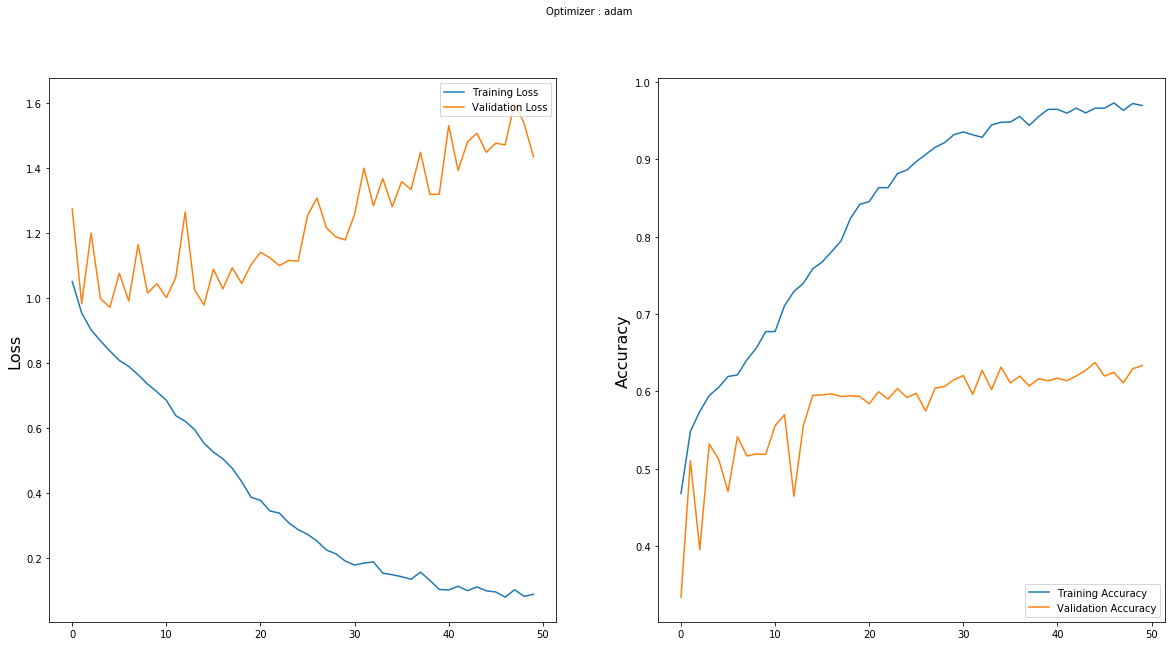

In [47]:
import matplotlib.pyplot as plt

x=history1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()